# Problem 2 (30 Points)

## Problem Description
In this problem, you are given a dataset with two input features and one output. You will use a regression tree to make predictions for this data, evaluating each model on both training and testing data. Then, you will repeat this for multiple random forests.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:
- RMSE function
- Create 4 decision tree prediction surface plots
- Create 4 random forest prediction surface plots
- Print RMSE for train and test data for 4 decision tree models
- Print RMSE for train and test data for 4 random forest models
- Answer the 3 questions posed throughout

#### Imports and Utility Functions:

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def make_plot(X,y,model, title=""):
    res = 100
    xrange = np.linspace(min(X[:,0]),max(X[:,0]),res)
    yrange = np.linspace(min(X[:,1]),max(X[:,1]),res)
    x1,x2 = np.meshgrid(xrange,yrange)
    xmesh = np.vstack([x1.flatten(),x2.flatten()]).T
    z = model.predict(xmesh).reshape(res,res)
    
    fig = plt.figure(figsize=(12,10))
    plt.subplots_adjust(left=0.3,right=0.9,bottom=.3,top=.9)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1,x2,z,cmap=cm.coolwarm,linewidth=0,alpha=0.9)
    ax.scatter(X[:,0],X[:,1],y,'o',c='black')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('y')
    plt.title(title)
    plt.show()

## Load the data
Use the `np.load()` function to load "w5-hw2-train.npy" (training data) and "w5-hw2-test.npy" (testing data). The first two columns of each are the input features. The last column is the output.
You should end up with 4 variables, input and output for each of the datasets.

In [46]:
# YOUR CODE GOES HERE
# load the data
training_data = np.load("data/w5-hw2-train.npy")
testing_data = np.load("data/w5-hw2-test.npy")

## RMSE function
Complete a root-mean-squared-error function, `RMSE(y, pred)`, which takes in two arrays, and computes the RMSE between them:

In [47]:
def RMSE(y, pred):
    # YOUR CODE GOES HERE
    RMSE = np.sqrt(np.mean((y - pred)**2))
    return RMSE

## Regression trees

Train 4 regression trees in sklearn, with max depth values [2,5,10,25]. Train your models on the training data.

Plot the predictions as a surface plot along with test points -- you can use the provided function: `make_plot(X, y, model, title)`.  
For each model, compute the train and test RMSE by calling your RMSE function. Print these results. 

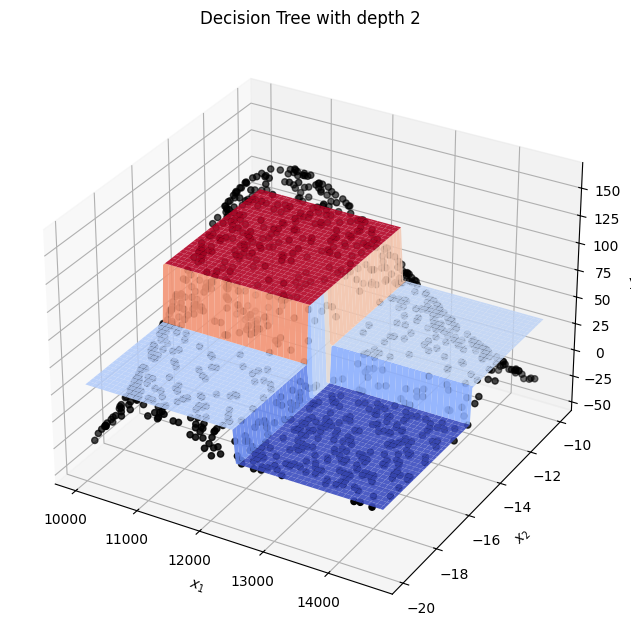

Testing data's RMSE for depth 2 : 37.54886839401237
Training data's RMSE for depth 2 : 35.47184989095342


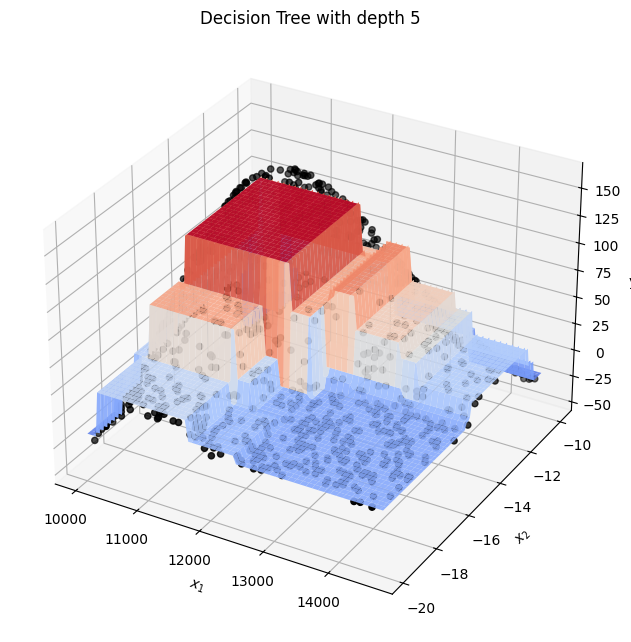

Testing data's RMSE for depth 5 : 19.02935744931633
Training data's RMSE for depth 5 : 17.932673237502154


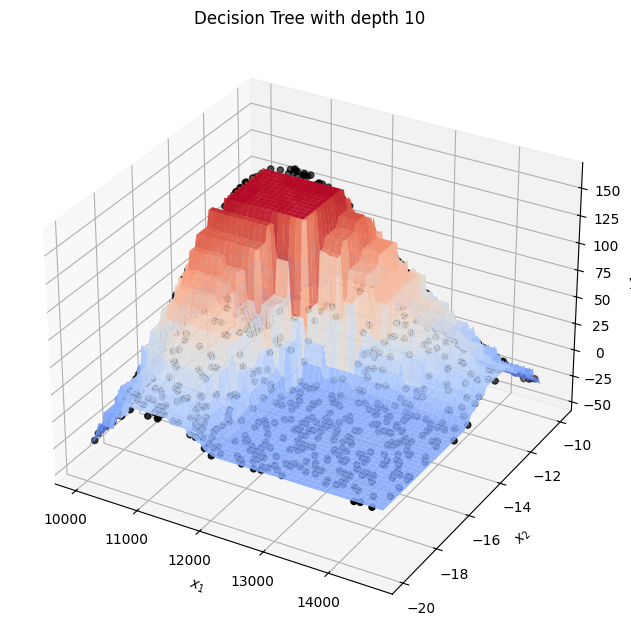

Testing data's RMSE for depth 10 : 7.866244284088834
Training data's RMSE for depth 10 : 4.417134916147934


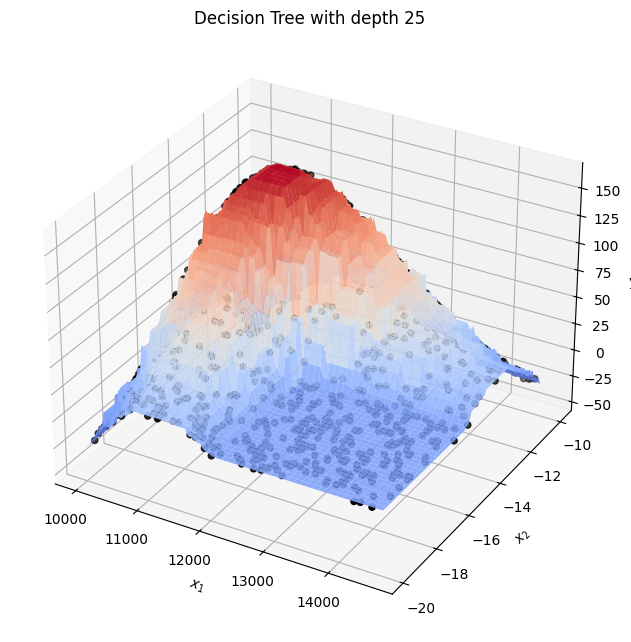

Testing data's RMSE for depth 25 : 6.403448273499582
Training data's RMSE for depth 25 : 0.0


In [48]:
# YOUR CODE GOES HERE
# train 4 reggression trees [max_depth=2, 5, 10, 25]
for depth in [2, 5, 10, 25]:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=0)
    dt.fit(training_data[:,:2], training_data[:,2])
    pred_test = dt.predict(testing_data[:,:2])
    pred_train = dt.predict(training_data[:,:2])
    make_plot(training_data[:,:2], training_data[:,2], dt, "Decision Tree with depth " + str(depth))
    print("Testing data's RMSE for depth", depth, ":", RMSE(testing_data[:,2], pred_test))
    print("Training data's RMSE for depth", depth, ":", RMSE(training_data[:,2], pred_train))

### Question
- Which of your regression trees performed the best on testing data?  

    From the trained regression trees above, the decision tree with depth 25 performed the best on the testing data.

## Regression trees

Train 4 random forests in sklearn. For all of them, use the max depth values from your best-performing regression tree. The number of estimators should vary, with values [5, 10, 25, 100]. 

Plot the predictions as a surface plot along with test points.
Once again, for each model, compute the train and test RMSE by calling your RMSE function. Print these results.

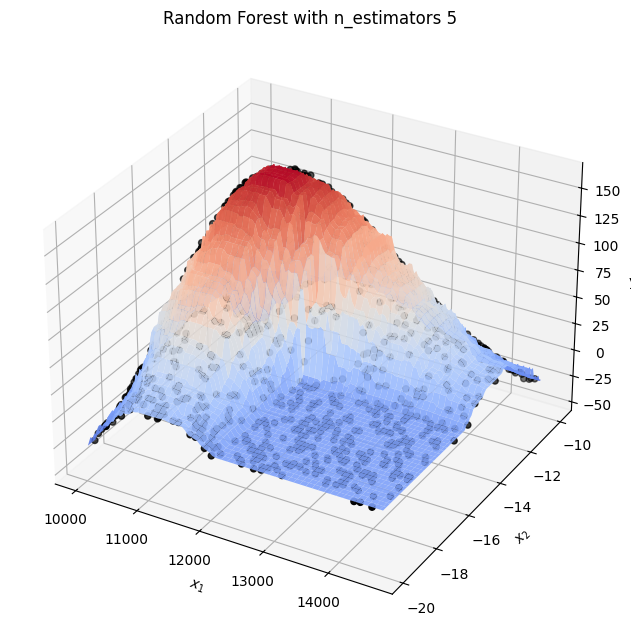

Testing data's RMSE for n_estimators 5 : 4.821397298554881
Training data's RMSE for n_estimators 5 : 2.4257706286936496


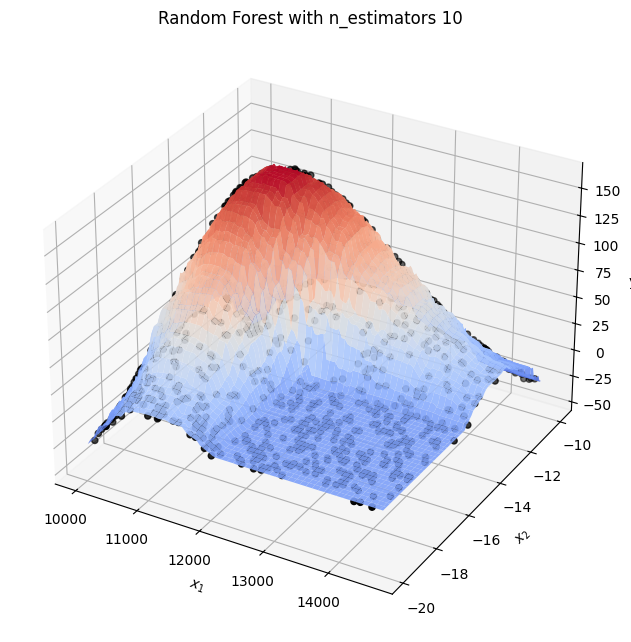

Testing data's RMSE for n_estimators 10 : 3.93158953023002
Training data's RMSE for n_estimators 10 : 1.8919014217557648


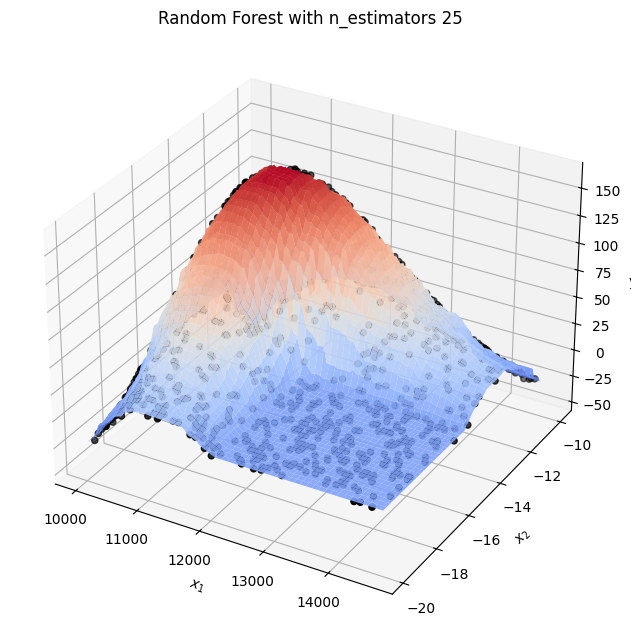

Testing data's RMSE for n_estimators 25 : 3.0837518355696627
Training data's RMSE for n_estimators 25 : 1.561223767447251


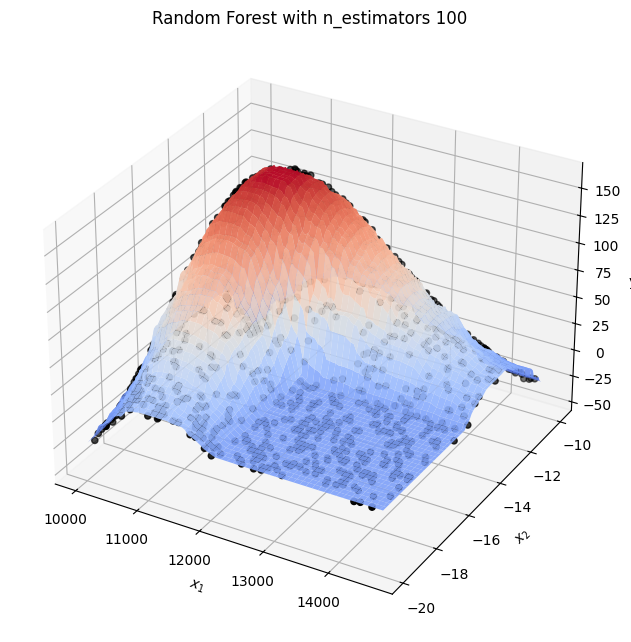

Testing data's RMSE for n_estimators 100 : 2.9242540919378075
Training data's RMSE for n_estimators 100 : 1.31763220906486


In [49]:
# YOUR CODE GOES HERE
# train 4 radom forest models [n_estimators=5, 10, 25, 100]
for n_estimator in [5, 10, 25, 100]:
    rf = RandomForestRegressor(n_estimators=n_estimator, max_depth=25, random_state=0)
    rf.fit(training_data[:,:2], training_data[:,2])
    pred_test = rf.predict(testing_data[:,:2])
    pred_train = rf.predict(training_data[:,:2])
    make_plot(training_data[:,:2], training_data[:,2], rf, "Random Forest with n_estimators " + str(n_estimator))
    print("Testing data's RMSE for n_estimators", n_estimator, ":", RMSE(testing_data[:,2], pred_test))
    print("Training data's RMSE for n_estimators", n_estimator, ":", RMSE(training_data[:,2], pred_train))

### Questions
- Which of your random forests performed the best on testing data?  

    From the trained random forests models above, the model with the number of estimators of 100 performed the best on the testing data.

- How does the random forest prediction surface differ qualitatively from that of the decision tree? 

    The surface of random forest prediction models tends to be smoother and more stable compared to decision trees. This is because random forest models are less prone to overfitting.